In [1]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd

In [4]:
def briere1(T, Tmin=10.0, Tmax=40.0, c=0.001):
    cond = (T > Tmin) & (T < Tmax)
    r = np.zeros(len(T))
    r[cond] = c * T[cond] * (T[cond] - Tmin) * np.sqrt(Tmax - T[cond])
    return r

def briere2(T, Tmin=10.0, Tmax=50.0, c=1.0, m=2.0):
    result = np.zeros(len(T))
    cond = (Tmin < T) & (T < Tmax)
    result[cond] = c * T[cond] * np.exp(np.log(T[cond] - Tmin) +  np.log(Tmax - T[cond]) / m)
    return result

# Fully biologically interpretable parametrization of flexTPC model
def flexTPC(T, Tmin=10.0, Tmax=40.0, rmax=1.0, α=0.8, β=0.2):
    result = np.zeros(len(T))
    cond = (Tmin < T) & (T < Tmax)
    s = α * (1.0 - α) / β**2
    result[cond] = rmax * np.exp(s * (α * (np.log(T[cond] - Tmin) - np.log(α)) +
                                      (1 - α) * (np.log(Tmax - T[cond]) - np.log(1 - α) )
                                       - np.log(Tmax - Tmin)))
    return result

# Exponential product curve.
def expprodcurve(T, Tmin=10.0, Tmax=50.0, c=1.0, kI=0.1, kU=0.5):
    result = np.zeros(len(T))
    cond = (Tmin < T) & (T < Tmax)
    result[cond] = c * (1.0 - np.exp(-kI*(T[cond] - Tmin))) * (1.0 - np.exp(-kU*(Tmax - T[cond])))
    return result

def flexTPCnd(τ, α=0.8, β=0.2):
    s = α * (1.0 - α) / β**2
    cond = (τ > 0) & (τ < 1)
    r = np.zeros(len(τ))
    r[cond] = np.exp(s * (α * (np.log(τ[cond]) - np.log(α)) + (1 - α) *  (np.log(1 - τ[cond]) - np.log(1-α))))
    return r

In [3]:
def f1(τ, α, s, wref=np.exp(-1/8)):
    return np.exp(np.log(α) + (1/ (α * s)) * np.log(wref) +((1-α)/(α)) * np.log((1-α)/(1-τ)))

def f2(τ, α, s, wref=np.exp(-1/8)):
    return 1 - np.exp(np.log(1 - α) + (1/ ((1 - α) * s)) * np.log(wref) + (α / (1-α)) * np.log(α / τ))

# Invert nondimensional flex numerically
def flexTPCroots(α, β, wref=np.exp(-1/8), err_tol=1e-3):
    s = α * (1.0 - α) / β**2
    τ1_prev = α * wref
    τ2_prev = α + (1-α) * (1 - wref)

    τ1 = f1(τ1_prev, α, s, wref=wref)
    τ2 = f2(τ2_prev, α, s, wref=wref)
    n_iter = 1
    err = np.maximum(np.abs((τ1 - τ1_prev) / τ1_prev), np.abs((τ2 - τ2_prev) / τ2_prev))
    while err > err_tol:
        τ1_prev = τ1
        τ2_prev = τ2
        τ1 = f1(τ1, α, s, wref=wref)
        τ2 = f2(τ2, α, s, wref=wref)
        err = np.maximum(np.abs((τ1 - τ1_prev) / τ1_prev), np.abs((τ2 - τ2_prev) / τ2_prev))
        n_iter += 1
    return τ1, τ2, n_iter, err
    

# Figure 1

## Panel A

/var/folders/g8/wjqhnz1n01d5l4pdv8cnykw40000gp/T/ipykernel_13589/1451454079.py:28: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


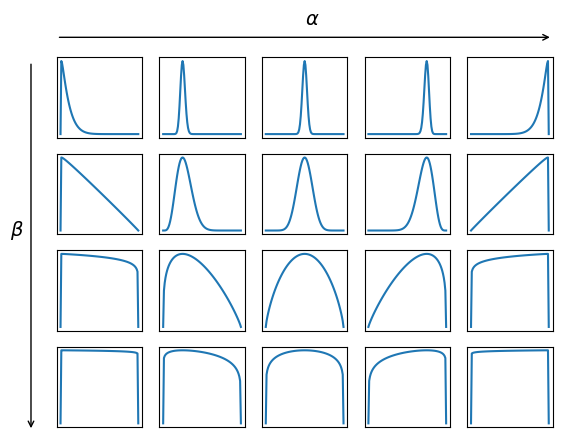

In [4]:
τ = np.arange(0, 1.01, 0.01)

fig, axarr = plt.subplots(4, 5)

for i, α in enumerate([0.01, 0.25, 0.5, 0.75, 0.99]):
    for j, β in enumerate([0.03, 0.1, 0.4, 1.0]):
        ax = axarr[j, i]
        ax.plot(τ, flexTPCnd(τ, α=α, β=β))
        
        if (i == 2) and (j == 0):
            ax.text(0.5, 1.5, r"$\alpha$", fontsize=14)
            ax.annotate('', xy=(-2.4, 1.25), xycoords='axes fraction',
                       xytext=(3.4, 1.25), arrowprops=dict(arrowstyle='<-', color='black'))
            #ax.arrow(0, 2, 1, 0, clip_on=False)
        
        if (i == 0) and (j == 2):
            ax.text(-0.65, 1.25, r"$\beta$", fontsize=14)
            ax.annotate('', xy=(-0.3, -1.25), xycoords='axes fraction',
                       xytext=(-0.3, 3.35), arrowprops=dict(arrowstyle='->', color='black'))
        # Hide X and Y axes label marks
        ax.xaxis.set_tick_params(labelbottom=False)
        ax.yaxis.set_tick_params(labelleft=False)

        # Hide X and Y axes tick marks
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout()
plt.savefig("flexTPC_shapes.svg")
plt.show()


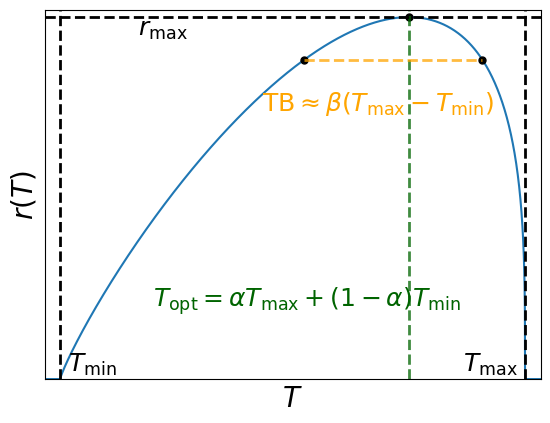

In [4]:
fig, ax = plt.subplots(1, 1)
T = np.arange(0, 50, 0.01)
#Previously s=1
α = 0.75
β = 0.4
wref = np.exp(-1/8)

plt.plot(T, flexTPC(T, α=α, β=β))
plt.xlabel(r"$T$", fontsize=20)
plt.ylabel(r"$r(T)$", fontsize=20)
#plt.title("The flexTPC model", fontsize=18)


#plt.plot(10, 0, '.k')
plt.text(10 + 0.5, 0.02, r"$T_{\min}$", fontsize=18)
plt.axvline(x=10, linestyle='--', color='black', linewidth=2)


#plt.plot(40, 0, '.k')
plt.text(40 - 4.0, 0.02, r"$T_{\max}$", fontsize=18)
plt.axvline(x=40, linestyle='--', color='black', linewidth=2)


#plt.text(0.2* 10 + 0.8*40, 0.1, r"$T_{\mathrm{opt}}$")
plt.plot(0.25* 10 + 0.75*40, 1.0, '.k', markersize=10)

plt.axvline(x=0.25* 10 + 0.75*40, linestyle='--', color='darkgreen', alpha=0.75, linewidth=2)
plt.text(0.25* 10 + 0.75*40 - 14 - 2.5, 0.2, r"$T_{\mathrm{opt}} = \alpha T_{\max} + (1 - \alpha) T_{\min}$",
         fontsize=18, color='darkgreen')

τ1, τ2, n_iter, err = flexTPCroots(α, β, wref=wref, err_tol=1e-10)
T1 = τ1 * (40 - 10) + 10
T2 = τ2 * (40 - 10) + 10

plt.plot(T1, wref, '.k', markersize=10)
plt.plot(T2, wref, '.k', markersize=10)
plt.hlines(y=wref, xmin=T1, xmax=T2, 
            linestyle='--', color='orange', alpha=0.75, linewidth=2)



plt.text(0.25* 10 + 0.75*40 - 9.5, 0.74, r"$\mathrm{TB} \approx \beta (T_{\max} - T_{\min})$",
         fontsize=18, color='orange')

plt.text(15, 0.95, r"$r_{\max}$", fontsize=18)
plt.axhline(y=1.0, linestyle='--', color='black', linewidth=2)


plt.xlim(10 - 1, 40 + 1)
plt.ylim(-0.001, 1.02)
ax = plt.gca()

# Hide X and Y axes label marks
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

# Hide X and Y axes tick marks
ax.set_xticks([])
ax.set_yticks([])

plt.savefig('scaling_params.svg')
plt.show()

## Figure 2

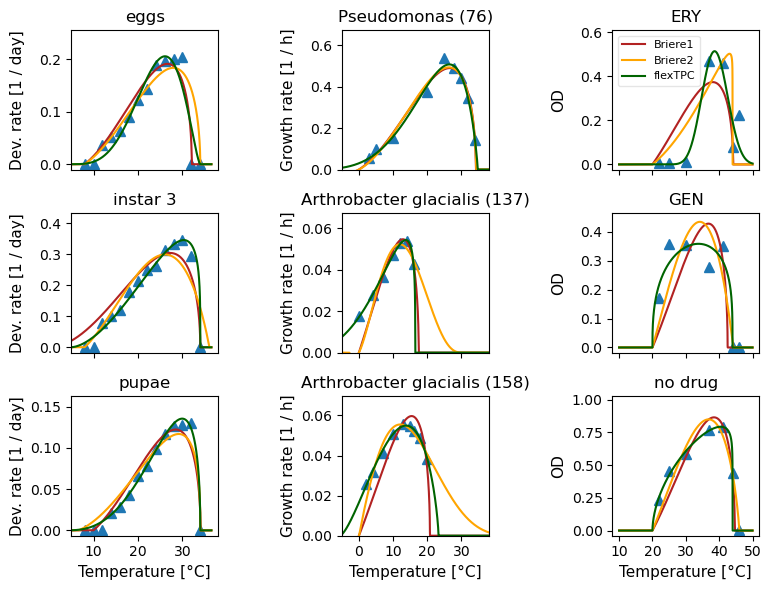

In [20]:
models = ['b1', 'b2', 'flexTPC']
label_name = {'b1': 'Briere1', 'b2': 'Briere2', 'flexTPC':'flexTPC'}
model_r = {'b1':briere1, 'b2':briere2, 'flexTPC':flexTPC}
color = {'b1':'firebrick',
         'b2':'orange',
         'flexTPC':'darkgreen'}
dataset = {'botrana':pd.read_csv('briere_data_L_botrana.csv'),
           'glacierbac':pd.read_csv('glacierbac.csv'),
           'abcoli':pd.read_csv('ab_data.csv')}
dataset['abcoli'] = dataset['abcoli'][dataset['abcoli']["drug2name"] == "WT"] # Filter only single drugs
dataset['abcoli'] = dataset['abcoli'].groupby(["drug1name", "T"], as_index=False).agg({'OD':'mean'}) # Calculate mean OD.

fit_params = {'botrana':{model:pd.read_csv(f'botrana_params_{model}.csv') for model in models},
              'glacierbac':{model:pd.read_csv(f'glacierbac_params_{model}.csv') for model in models},
              'abcoli':{model:pd.read_csv(f'abcoli_params_{model}.csv') for model in models}}
curves_to_plot = {'botrana':[['eggs', 'instar 3', 'pupae'], 
                             ['eggs', 'i3', 'pupae']],
                  'glacierbac':[['Pseudomonas (76)', 'Arthrobacter glacialis (137)', 'Arthrobacter glacialis (158)'], 
                                [76, 137, 158]],
                  'abcoli':[['ERY', 'GEN', 'no drug'], 
                            ['ERY', 'GEN', 'WT']]}

ax_label_fontsize = 11
title_fontsize = 12

fig, axarr = plt.subplots(3, 3, figsize=(6.5*1.2, 5*1.2), sharex='col')

T = np.arange(5, 36.5, 0.001)
data = dataset['botrana']
i = 0
for plot_title, stage in zip(curves_to_plot['botrana'][0], curves_to_plot['botrana'][1]):
    ax = axarr[i, 0]
    ax.plot(data['T'], 1 / data[stage], '^', markersize=7)

    for model in models:
        params = fit_params['botrana'][model][fit_params['botrana'][model]['stage'] == stage]
        ax.plot(T, model_r[model](T, *params.iloc[0, 1:-1]), color=color[model],
               label=label_name[model])
    if i == 2:
        ax.set_xlabel("Temperature [°C]", fontsize=ax_label_fontsize)
    ax.set_xlim(5, 38)
    ax.set_xticks([10, 20, 30])
    ax.set_ylabel("Dev. rate [1 / day]", fontsize=ax_label_fontsize)
    ax.set_ylim(-0.05*np.max(1 / data[stage]), 1.25*np.max(1 / data[stage]))
    ax.set_title(plot_title, fontsize=title_fontsize)
    i += 1


T = np.arange(-10, 40, 0.001)
data = dataset['glacierbac']
i = 0
for plot_title, strain in zip(curves_to_plot['glacierbac'][0], curves_to_plot['glacierbac'][1]):
    ax = axarr[i, 1]
    subset = data[data['strain'] == strain]
    ax.plot(subset['T'], subset["r"], '^', markersize=7)
    for model in models:
        params = fit_params['glacierbac'][model][fit_params['glacierbac'][model]['strain'] == strain]
        ax.plot(T, model_r[model](T, *params.iloc[0, 2:-1]), color=color[model])
    if i == 2:
        ax.set_xlabel("Temperature [°C]", fontsize=ax_label_fontsize) 
    ax.set_xlim(-5, 38)
    ax.set_xticks([0, 10, 20, 30])
    
    ax.set_ylabel("Growth rate [1 / h]", fontsize=ax_label_fontsize )
    ax.set_ylim(0, 1.25*np.max(subset["r"]) )
    
    ax.set_title(plot_title, fontsize=title_fontsize)
    i += 1


T = np.arange(10, 50, 0.001)
data = dataset['abcoli']
i = 0
for plot_title, drug in zip(curves_to_plot['abcoli'][0], curves_to_plot['abcoli'][1]):
    ax = axarr[i, 2]
    subset = data[(data['drug1name'] == drug)]
    ax.plot(subset['T'], subset["OD"], '^', markersize=7)
    for model in models:
        params = fit_params['abcoli'][model][fit_params['abcoli'][model]['drug'] == drug]
        ax.plot(T, model_r[model](T, *params.iloc[0, 1:-1]), color=color[model], label=label_name[model])
    if i == 0:
        ax.legend(fontsize=8, loc='upper left', fancybox=True, framealpha=0.5)
    if i == 2:
        ax.set_xlabel("Temperature [°C]", fontsize=ax_label_fontsize)
    ax.set_ylabel("OD", fontsize=ax_label_fontsize )
    ax.set_xticks([10, 20, 30, 40, 50])
    #ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8])
    ax.set_ylim(-0.05*np.max(subset["OD"]), 1.3*np.max(subset["OD"]) )
    ax.set_title(plot_title, fontsize=title_fontsize)
    i += 1


fig.align_ylabels()

plt.tight_layout(w_pad=4.5)

plt.savefig("TPC_examples.svg")
plt.savefig("TPC_examples.png")
plt.savefig("TPC_examples.pdf")

# Figure 4

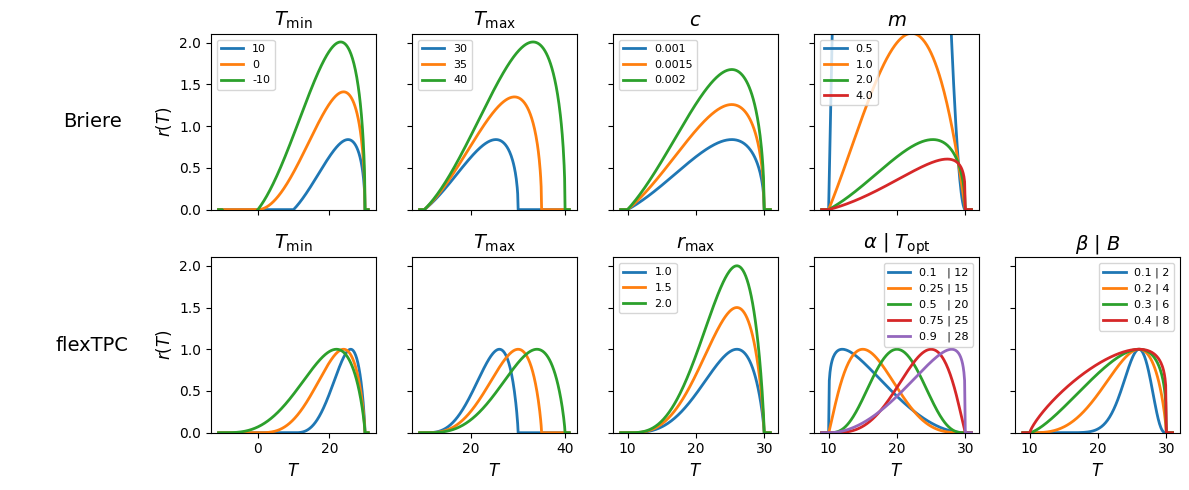

In [95]:
fig, axarr = plt.subplots(2, 6, figsize=(12, 5), sharex='col')

# Global plot parameters.
lwd = 2
axfontsize = 12.0
axlabelfs = 12.0
titlefs = 14.0

ax = axarr[0, 0]
ax.text(0.5, 0.5, 'Briere', fontsize=14, horizontalalignment='center',
        verticalalignment='center')
ax.axis('off')

ax = axarr[1, 0]
ax.text(0.5, 0.5, 'flexTPC', fontsize=14,horizontalalignment='center',
        verticalalignment='center')
ax.axis('off')



# Tmin
T = np.arange(-11, 31, 0.1)
ax = axarr[0, 1]
for i, Tmin in enumerate([10, 0, -10]):
    ax.plot(T, briere1(T, Tmin=Tmin, Tmax=30, c=0.001),
           label=f'{Tmin}', linewidth=lwd)
ax.set_title(r'$T_{\min}$', fontsize=titlefs)
ax.set_ylim(0, 2.1)
ax.set_ylabel(r'$r(T)$', fontsize=axlabelfs)
ax.legend(loc='best', fontsize=8)

ax = axarr[1, 1]
for i, Tmin in enumerate([10, 0, -10]):
    ax.plot(T, flexTPC(T, Tmin=Tmin, rmax=1.0, Tmax=30, α=0.8, β=0.2),
           label=f'{Tmin}', linewidth=lwd)
    #ax.axhline(y=1, linestyle='--', color='black')
ax.set_title(r'$T_{\min}$', fontsize=titlefs)
ax.set_ylim(0, 2.1)
ax.set_ylabel(r'$r(T)$', fontsize=axlabelfs)
ax.set_xlabel(r'$T$', fontsize=axlabelfs)
#ax.legend(loc='best', fontsize=8)


# Tmax
T = np.arange(9, 41, 0.1)

ax = axarr[0, 2]
for i, Tmax in enumerate([30, 35, 40]):
    ax.plot(T, briere1(T, Tmin=10.0, Tmax=Tmax, c=0.001),
           label=f'{Tmax}', linewidth=lwd)
ax.set_ylim(0, 2.1)
ax.set_title(r'$T_{\max}$', fontsize=titlefs)
ax.legend(loc='best', fontsize=8)
ax.set_yticklabels([])

ax = axarr[1, 2]
for i, Tmax in enumerate([30, 35, 40]):
    ax.plot(T, flexTPC(T, Tmin=10.0, rmax=1.0, Tmax=Tmax, α=0.8, β=0.2),
           label=f'Tmax={Tmax}', linewidth=lwd)
    #ax.axhline(y=1, linestyle='--', color='black')
ax.set_ylim(0, 2.1)
ax.set_title(r'$T_{\max}$', fontsize=titlefs)
ax.set_xlabel(r'$T$', fontsize=axlabelfs)
#ax.legend(loc='best', fontsize=8)
ax.set_yticklabels([])



# c / rmax
T = np.arange(9, 31, 0.1)
ax = axarr[0, 3]
for i, c in enumerate([0.001, 0.0015, 0.002]):
    ax.plot(T, briere1(T, Tmin=10.0, Tmax=30.0, c=c),
           label=f'{c}', linewidth=lwd)
ax.set_ylim(0, 2.1)
ax.set_title(r'$c$', fontsize=titlefs)
ax.legend(loc='best', fontsize=8)
ax.set_yticklabels([])

ax = axarr[1, 3]
for i, rmax in enumerate([1.0, 1.5, 2.0]):
    ax.plot(T, flexTPC(T, Tmin=10.0, rmax=rmax, Tmax=30.0, α=0.8, β=0.2),
           label=f'{rmax}', linewidth=lwd)
    #ax.axhline(y=1, linestyle='--', color='black')
ax.set_ylim(0, 2.1)
ax.set_title(r'$r_{\max}$', fontsize=titlefs)
ax.set_xlabel(r'$T$', fontsize=axlabelfs)
ax.legend(loc='best', fontsize=8)
ax.set_yticklabels([])



# m / alpha / Topt
T = np.arange(9, 31, 0.1)
ax = axarr[0, 4]
for i, m in enumerate([0.5, 1.0, 2.0, 4.0]):
    ax.plot(T, briere2(T, Tmin=10.0, Tmax=30.0, c=0.001, m=m),
           label=f'{m}', linewidth=lwd)
ax.set_ylim(0, 2.1)
ax.set_title(r'$m$', fontsize=titlefs)
ax.legend(loc='best', fontsize=8)
ax.set_yticklabels([])

ax = axarr[1, 4]
for i, α in enumerate([0.1, 0.25, 0.5, 0.75, 0.9]):
    Topt = int(round(α * 30 + (1 - α) * 10))
    ax.plot(T, flexTPC(T, Tmin=10.0, rmax=1.0, Tmax=30.0, α=α, β=0.2),
           label=f'{α}' + ('  ' * (α in (0.1, 0.5, 0.9))) + f' | {Topt}', linewidth=lwd)
    #ax.axhline(y=1, linestyle='--', color='black')
ax.set_ylim(0, 2.1)
ax.set_title(r'$\alpha$ | $T_\mathrm{opt}$', fontsize=titlefs)
ax.set_xlabel(r'$T$', fontsize=axlabelfs)
ax.legend(loc='best', fontsize=8)
ax.set_yticklabels([])


# beta / B
T = np.arange(9, 31, 0.1)
ax = axarr[0, 5]
ax.axis('off')

ax = axarr[1, 5]
for i, β in enumerate([0.1, 0.2, 0.3, 0.4]):
    B = int(round(β * (30 - 10)))
    ax.plot(T, flexTPC(T, Tmin=10.0, rmax=1.0, Tmax=30.0, α=0.8, β=β),
           label=f'{β} | {B}', linewidth=lwd)
    #ax.axhline(y=1, linestyle='--', color='black')
ax.set_ylim(0, 2.1)
ax.set_title(r'$\beta$ | $B$', fontsize=titlefs)
ax.set_xlabel(r'$T$', fontsize=axlabelfs)
ax.legend(loc='best', fontsize=8)
ax.set_yticklabels([])

plt.tight_layout(w_pad=-1.5)
plt.savefig('Figure4.svg')
plt.show()

Text(0, 0.5, 'performance')

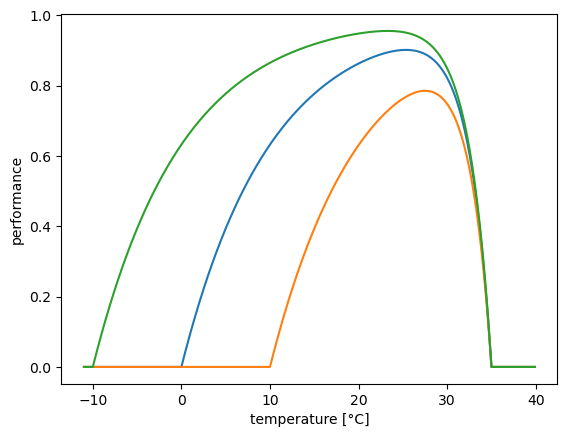

In [11]:
T = np.arange(-11, 40, 0.1)

plt.plot(T, expprodcurve(T, 0, 35, 1, 0.1, 0.4))
plt.plot(T, expprodcurve(T, 10, 35, 1, 0.1, 0.4))
plt.plot(T, expprodcurve(T, -10, 35, 1, 0.1, 0.4))
plt.xlabel('temperature [°C]')
plt.ylabel('performance')

In [ ]:
fig, axarr = plt.subplots(2, 6, figsize=(12, 5), sharex='col')

# Global plot parameters.
lwd = 2
axfontsize = 12.0
axlabelfs = 12.0
titlefs = 14.0

ax = axarr[0, 0]
ax.text(0.5, 0.5, 'Briere', fontsize=14, horizontalalignment='center',
        verticalalignment='center')
ax.axis('off')

ax = axarr[1, 0]
ax.text(0.5, 0.5, 'flexTPC', fontsize=14,horizontalalignment='center',
        verticalalignment='center')
ax.axis('off')



# Tmin
T = np.arange(-11, 31, 0.1)
ax = axarr[0, 1]
for i, Tmin in enumerate([10, 0, -10]):
    ax.plot(T, briere1(T, Tmin=Tmin, Tmax=30, c=0.001),
           label=f'{Tmin}', linewidth=lwd)
ax.set_title(r'$T_{\min}$', fontsize=titlefs)
ax.set_ylim(0, 2.1)
ax.set_ylabel(r'$r(T)$', fontsize=axlabelfs)
ax.legend(loc='best', fontsize=8)

ax = axarr[1, 1]
for i, Tmin in enumerate([10, 0, -10]):
    ax.plot(T, flexTPC(T, Tmin=Tmin, rmax=1.0, Tmax=30, α=0.8, β=0.2),
           label=f'{Tmin}', linewidth=lwd)
    #ax.axhline(y=1, linestyle='--', color='black')
ax.set_title(r'$T_{\min}$', fontsize=titlefs)
ax.set_ylim(0, 2.1)
ax.set_ylabel(r'$r(T)$', fontsize=axlabelfs)
ax.set_xlabel(r'$T$', fontsize=axlabelfs)
#ax.legend(loc='best', fontsize=8)


# Tmax
T = np.arange(9, 41, 0.1)

ax = axarr[0, 2]
for i, Tmax in enumerate([30, 35, 40]):
    ax.plot(T, briere1(T, Tmin=10.0, Tmax=Tmax, c=0.001),
           label=f'{Tmax}', linewidth=lwd)
ax.set_ylim(0, 2.1)
ax.set_title(r'$T_{\max}$', fontsize=titlefs)
ax.legend(loc='best', fontsize=8)
ax.set_yticklabels([])

ax = axarr[1, 2]
for i, Tmax in enumerate([30, 35, 40]):
    ax.plot(T, flexTPC(T, Tmin=10.0, rmax=1.0, Tmax=Tmax, α=0.8, β=0.2),
           label=f'Tmax={Tmax}', linewidth=lwd)
    #ax.axhline(y=1, linestyle='--', color='black')
ax.set_ylim(0, 2.1)
ax.set_title(r'$T_{\max}$', fontsize=titlefs)
ax.set_xlabel(r'$T$', fontsize=axlabelfs)
#ax.legend(loc='best', fontsize=8)
ax.set_yticklabels([])



# c / rmax
T = np.arange(9, 31, 0.1)
ax = axarr[0, 3]
for i, c in enumerate([0.001, 0.0015, 0.002]):
    ax.plot(T, briere1(T, Tmin=10.0, Tmax=30.0, c=c),
           label=f'{c}', linewidth=lwd)
ax.set_ylim(0, 2.1)
ax.set_title(r'$c$', fontsize=titlefs)
ax.legend(loc='best', fontsize=8)
ax.set_yticklabels([])

ax = axarr[1, 3]
for i, rmax in enumerate([1.0, 1.5, 2.0]):
    ax.plot(T, flexTPC(T, Tmin=10.0, rmax=rmax, Tmax=30.0, α=0.8, β=0.2),
           label=f'{rmax}', linewidth=lwd)
    #ax.axhline(y=1, linestyle='--', color='black')
ax.set_ylim(0, 2.1)
ax.set_title(r'$r_{\max}$', fontsize=titlefs)
ax.set_xlabel(r'$T$', fontsize=axlabelfs)
ax.legend(loc='best', fontsize=8)
ax.set_yticklabels([])



# m / alpha / Topt
T = np.arange(9, 31, 0.1)
ax = axarr[0, 4]
for i, m in enumerate([0.5, 1.0, 2.0, 4.0]):
    ax.plot(T, briere2(T, Tmin=10.0, Tmax=30.0, c=0.001, m=m),
           label=f'{m}', linewidth=lwd)
ax.set_ylim(0, 2.1)
ax.set_title(r'$m$', fontsize=titlefs)
ax.legend(loc='best', fontsize=8)
ax.set_yticklabels([])

ax = axarr[1, 4]
for i, α in enumerate([0.1, 0.25, 0.5, 0.75, 0.9]):
    Topt = int(round(α * 30 + (1 - α) * 10))
    ax.plot(T, flexTPC(T, Tmin=10.0, rmax=1.0, Tmax=30.0, α=α, β=0.2),
           label=f'{α}' + ('  ' * (α in (0.1, 0.5, 0.9))) + f' | {Topt}', linewidth=lwd)
    #ax.axhline(y=1, linestyle='--', color='black')
ax.set_ylim(0, 2.1)
ax.set_title(r'$\alpha$ | $T_\mathrm{opt}$', fontsize=titlefs)
ax.set_xlabel(r'$T$', fontsize=axlabelfs)
ax.legend(loc='best', fontsize=8)
ax.set_yticklabels([])


# beta / B
T = np.arange(9, 31, 0.1)
ax = axarr[0, 5]
ax.axis('off')

ax = axarr[1, 5]
for i, β in enumerate([0.1, 0.2, 0.3, 0.4]):
    B = int(round(β * (30 - 10)))
    ax.plot(T, flexTPC(T, Tmin=10.0, rmax=1.0, Tmax=30.0, α=0.8, β=β),
           label=f'{β} | {B}', linewidth=lwd)
    #ax.axhline(y=1, linestyle='--', color='black')
ax.set_ylim(0, 2.1)
ax.set_title(r'$\beta$ | $B$', fontsize=titlefs)
ax.set_xlabel(r'$T$', fontsize=axlabelfs)
ax.legend(loc='best', fontsize=8)
ax.set_yticklabels([])

plt.tight_layout(w_pad=-1.5)
plt.savefig('Figure4_response.svg')
plt.show()

In [89]:
(0.5 % 0.1)

0.09999999999999998

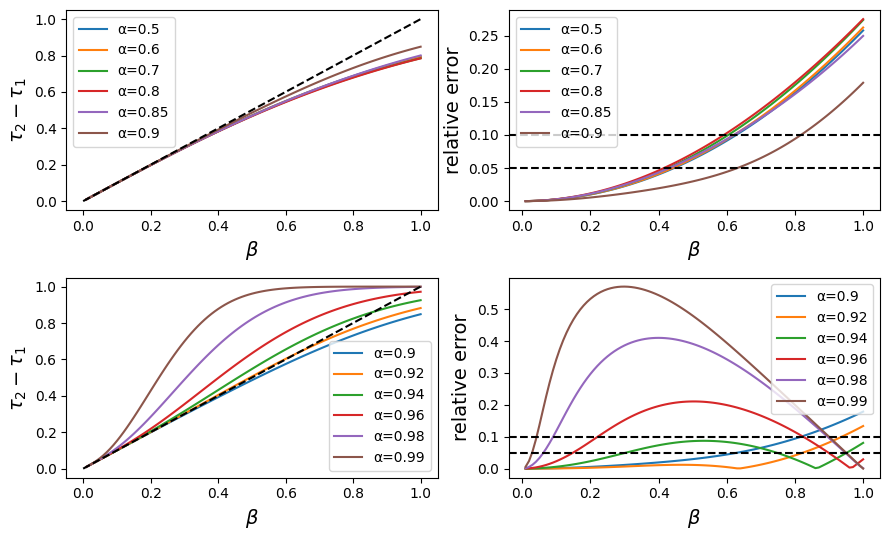

In [20]:
fig, axarr = plt.subplots(2, 2, figsize=(9, 5.5))
αvals = [0.5, 0.6, 0.7, 0.8, 0.85, 0.9]
βvals = np.arange(0.01, 1.01, 0.01)
wref = np.exp(-1/8)


label_fs = 14 # x and y label fontsize

ax = axarr[0, 0]
for α in αvals:
    trueβ = []
    for β in βvals:
        τ1, τ2, n_iter, err = flexTPCroots(α, β, wref=wref, err_tol=1e-10)
        trueβ.append(τ2 - τ1)
    trueβ = np.array(trueβ)
    ax.plot(βvals, trueβ, '-', label=f'α={α}')
ax.plot((0, 1), (0, 1), '--k')
ax.set_xlabel(r'$\beta$', fontsize=label_fs)
ax.set_ylabel(r'$\tau_{2} - \tau_{1}$', fontsize=label_fs)
ax.legend(loc='best')

ax = axarr[0, 1]
for α in αvals:
    trueβ = []
    for β in βvals:
        τ1, τ2, n_iter, err = flexTPCroots(α, β, wref=wref, err_tol=1e-10)
        trueβ.append(τ2 - τ1)
    trueβ = np.array(trueβ)
    ax.plot(βvals, np.abs(βvals - trueβ) / trueβ , '-', label=f'α={α}')

ax.set_xlabel(r'$\beta$', fontsize=label_fs)
#ax.set_ylabel(r'$\left| \frac{\beta - (\tau_{2} - \tau_{1}) }{\tau_{2} - \tau_{1}} \right|$', fontsize=label_fs)
ax.set_ylabel('relative error', fontsize=label_fs)

ax.axhline(y=0.05, linestyle='--', color='black')
ax.axhline(y=0.1, linestyle='--', color='black')
ax.legend(loc='best')

αvals = [0.9, 0.92, 0.94,0.96, 0.98, 0.99]
βvals = np.arange(0.01, 1.01, 0.01)

ax = axarr[1, 0]
for α in αvals:
    trueβ = []
    for β in βvals:
        τ1, τ2, n_iter, err = flexTPCroots(α, β, wref=wref, err_tol=1e-10)
        trueβ.append(τ2 - τ1)
    trueβ = np.array(trueβ)
    ax.plot(βvals, trueβ, '-', label=f'α={α}')
ax.plot((0, 1), (0, 1), '--k')
ax.set_xlabel(r'$\beta$', fontsize=label_fs)
ax.set_ylabel(r'$\tau_{2} - \tau_{1}$', fontsize=label_fs)
ax.legend(loc='best')

ax = axarr[1, 1]
for α in αvals:
    trueβ = []
    for β in βvals:
        τ1, τ2, n_iter, err = flexTPCroots(α, β, wref=wref, err_tol=1e-10)
        trueβ.append(τ2 - τ1)
    trueβ = np.array(trueβ)
    ax.plot(βvals, np.abs(βvals - trueβ) / (trueβ) , '-', label=f'α={α}')

ax.set_xlabel(r'$\beta$', fontsize=label_fs)
#ax.set_ylabel(r'$\left| \frac{\beta - (\tau_{2} - \tau_{1}) }{\tau_{2} - \tau_{1}} \right|$', fontsize=label_fs)
ax.set_ylabel('relative error', fontsize=label_fs)

ax.axhline(y=0.05, linestyle='--', color='black')
ax.axhline(y=0.1, linestyle='--', color='black')
ax.legend(loc='best')
plt.tight_layout()

plt.savefig("beta_approx_err.svg")
plt.savefig("beta_approx_err.png")
plt.savefig("beta_approx_err.pdf")

/var/folders/g8/wjqhnz1n01d5l4pdv8cnykw40000gp/T/ipykernel_13589/3482828753.py:22: RuntimeWarning: invalid value encountered in scalar divide
  err = np.maximum(np.abs((τ1 - τ1_prev) / τ1_prev), np.abs((τ2 - τ2_prev) / τ2_prev))


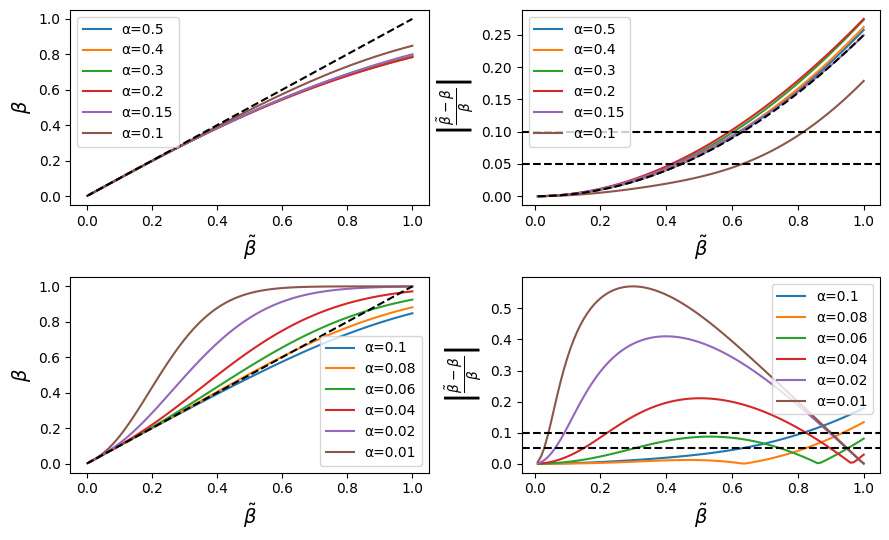

In [38]:
fig, axarr = plt.subplots(2, 2, figsize=(9, 5.5))
αvals = [0.5, 0.4, 0.3, 0.2, 0.15, 0.1]
βvals_hf = np.arange(0.01, 1.01, 0.01)
wref = 0.5

label_fs = 14 # x and y label fontsize

ax = axarr[0, 0]
for α in αvals:
    trueβ = []
    for β_h in βvals_hf:
        β = β_h / np.sqrt(-8 * np.log(wref))
        τ1, τ2, n_iter, err = flexTPCroots(α, β, wref=wref, err_tol=1e-10)
        trueβ.append(τ2 - τ1)
    trueβ = np.array(trueβ)
    ax.plot(βvals_hf, trueβ, '-', label=f'α={α}')
ax.plot((0, 1), (0, 1), '--k')
ax.set_xlabel(r'$\tilde{\beta}$', fontsize=label_fs)
ax.set_ylabel(r'$\beta$', fontsize=label_fs)
ax.legend(loc='best')

ax = axarr[0, 1]
for α in αvals:
    trueβ = []
    for β_h in βvals_hf:
        β = β_h / np.sqrt(-8 * np.log(wref))
        τ1, τ2, n_iter, err = flexTPCroots(α, β, wref=wref, err_tol=1e-10)
        trueβ.append(τ2 - τ1)
    trueβ = np.array(trueβ)
    ax.plot(βvals_hf, np.abs(βvals - trueβ) / trueβ , '-', label=f'α={α}')

ax.plot(βvals, 0.25 * βvals**2, '--k')

ax.set_xlabel(r'$\tilde{\beta}$', fontsize=label_fs)
ax.set_ylabel(r'$\left| \frac{\tilde{\beta} - \beta}{\beta} \right|$', fontsize=label_fs)

ax.axhline(y=0.05, linestyle='--', color='black')
ax.axhline(y=0.1, linestyle='--', color='black')
ax.legend(loc='best')

αvals = [0.1, 0.08, 0.06,0.04, 0.02, 0.01]
βvals = np.arange(0.01, 1.01, 0.01)

ax = axarr[1, 0]
for α in αvals:
    trueβ = []
    for β_h in βvals_hf:
        β = β_h / np.sqrt(-8 * np.log(wref))
        τ1, τ2, n_iter, err = flexTPCroots(α, β, wref=wref, err_tol=1e-10)
        trueβ.append(τ2 - τ1)
    trueβ = np.array(trueβ)
    ax.plot(βvals, trueβ, '-', label=f'α={α}')
ax.plot((0, 1), (0, 1), '--k')
ax.set_xlabel(r'$\tilde{\beta}$', fontsize=label_fs)
ax.set_ylabel(r'$\beta$', fontsize=label_fs)
ax.legend(loc='best')

ax = axarr[1, 1]
for α in αvals:
    trueβ = []
    for β_h in βvals_hf:
        β = β_h / np.sqrt(-8 * np.log(wref))
        τ1, τ2, n_iter, err = flexTPCroots(α, β, wref=wref, err_tol=1e-10)
        trueβ.append(τ2 - τ1)
    trueβ = np.array(trueβ)
    ax.plot(βvals, np.abs(βvals - trueβ) / (trueβ) , '-', label=f'α={α}')

ax.set_xlabel(r'$\tilde{\beta}$', fontsize=label_fs)
ax.set_ylabel(r'$\left| \frac{\tilde{\beta} - \beta}{\beta} \right|$', fontsize=label_fs)

ax.axhline(y=0.05, linestyle='--', color='black')
ax.axhline(y=0.1, linestyle='--', color='black')
ax.legend(loc='best')
plt.tight_layout()

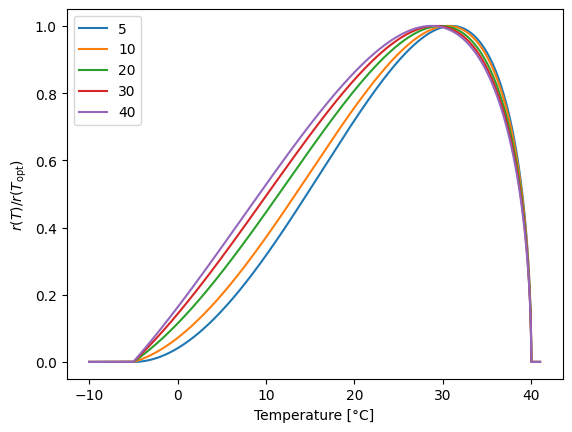

In [16]:
T = np.arange(-10, 41, 0.01)
for Toffset in [5, 10, 20, 30, 40]:
    plt.plot(T, briere1(T + Toffset, Tmin=-5 + Toffset, Tmax=40.0 + Toffset, c=0.001)
            / np.max(briere1(T + Toffset, Tmin=-5 + Toffset, Tmax=40.0 + Toffset, c=0.001)),
            label=f'{Toffset}')
plt.xlabel("Temperature [°C]")
plt.ylabel(r"$r(T) / r(T_\mathrm{opt})$")
plt.legend(loc='best')
plt.savefig('shifted_briere1.svg')
plt.savefig('shifted_briere1.pdf')

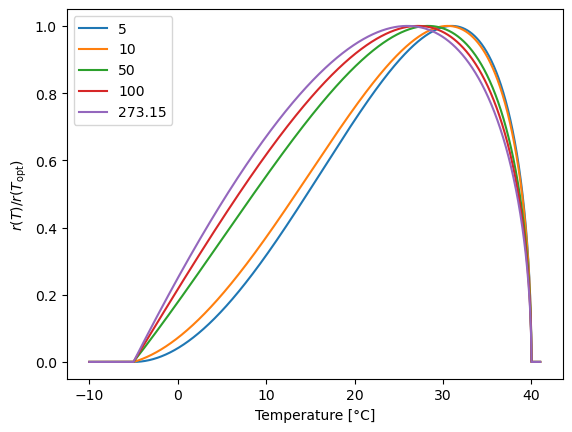

In [4]:
T = np.arange(-10, 41, 0.01)
for Toffset in [5, 10, 50, 100, 273.15]:
    plt.plot(T, briere1(T + Toffset, Tmin=-5 + Toffset, Tmax=40.0 + Toffset, c=0.001)
            / np.max(briere1(T + Toffset, Tmin=-5 + Toffset, Tmax=40.0 + Toffset, c=0.001)),
            label=f'{Toffset}')
plt.xlabel("Temperature [°C]")
plt.ylabel(r"$r(T) / r(T_\mathrm{opt})$")
plt.legend(loc='best')
plt.savefig('shifted_briere2.svg')
plt.savefig('shifted_briere2.pdf')

/var/folders/g8/wjqhnz1n01d5l4pdv8cnykw40000gp/T/ipykernel_26164/3835157652.py:21: RuntimeWarning: invalid value encountered in scalar divide
  err = np.maximum(np.abs((τ1 - τ1_prev) / τ1_prev), np.abs((τ2 - τ2_prev) / τ2_prev))


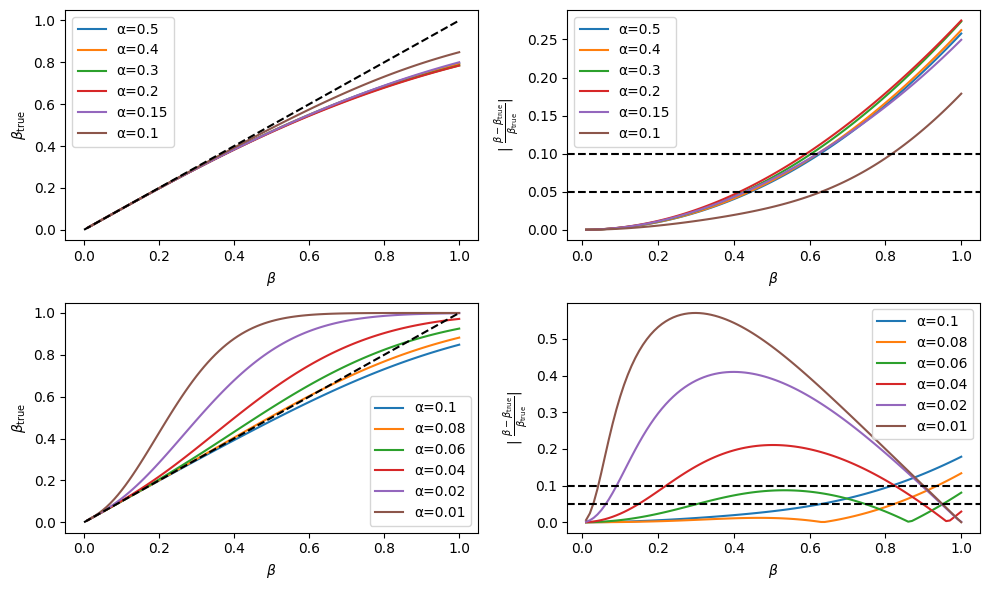

In [161]:
fig, axarr = plt.subplots(2, 2, figsize=(10, 6))
αvals = np.round(1.0 - np.array([0.5, 0.6, 0.7, 0.8, 0.85, 0.9]), 2)
βvals = np.arange(0.01, 1.01, 0.01)

ax = axarr[0, 0]
for α in αvals:
    trueβ = []
    for β in βvals:
        τ1, τ2, n_iter, err = flexTPCroots(α, β, wref=wref, err_tol=1e-10)
        trueβ.append(τ2 - τ1)
    trueβ = np.array(trueβ)
    ax.plot(βvals, trueβ, '-', label=f'α={α}')
ax.plot((0, 1), (0, 1), '--k')
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'$\beta_{\mathrm{true}}$')
ax.legend(loc='best')

ax = axarr[0, 1]
for α in αvals:
    trueβ = []
    for β in βvals:
        τ1, τ2, n_iter, err = flexTPCroots(α, β, wref=wref, err_tol=1e-10)
        trueβ.append(τ2 - τ1)
    trueβ = np.array(trueβ)
    ax.plot(βvals, np.abs(βvals - trueβ) / trueβ , '-', label=f'α={α}')

ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'| $\frac{\beta - \beta_{\mathrm{true}}}{\beta_{\mathrm{true}}} |$')

ax.axhline(y=0.05, linestyle='--', color='black')
ax.axhline(y=0.1, linestyle='--', color='black')
ax.legend(loc='best')

αvals = np.round(1 - np.array([0.9, 0.92, 0.94,0.96, 0.98, 0.99]), 2)
βvals = np.arange(0.01, 1.01, 0.01)

ax = axarr[1, 0]
for α in αvals:
    trueβ = []
    for β in βvals:
        τ1, τ2, n_iter, err = flexTPCroots(α, β, wref=wref, err_tol=1e-10)
        trueβ.append(τ2 - τ1)
    trueβ = np.array(trueβ)
    ax.plot(βvals, trueβ, '-', label=f'α={α}')
ax.plot((0, 1), (0, 1), '--k')
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'$\beta_{\mathrm{true}}$')
ax.legend(loc='best')

ax = axarr[1, 1]
for α in αvals:
    trueβ = []
    for β in βvals:
        τ1, τ2, n_iter, err = flexTPCroots(α, β, wref=wref, err_tol=1e-10)
        trueβ.append(τ2 - τ1)
    trueβ = np.array(trueβ)
    ax.plot(βvals, np.abs(βvals - trueβ) / (trueβ) , '-', label=f'α={α}')

ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'| $\frac{\beta - \beta_{\mathrm{true}}}{\beta_{\mathrm{true}}} |$')

ax.axhline(y=0.05, linestyle='--', color='black')
ax.axhline(y=0.1, linestyle='--', color='black')
ax.legend(loc='best')



plt.tight_layout()

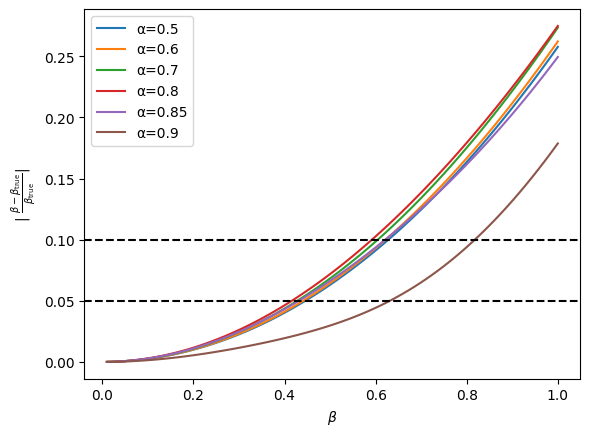

In [145]:
fig, ax = plt.subplots(1, 1)
αvals = [0.5, 0.6, 0.7, 0.8, 0.85, 0.9]
βvals = np.arange(0.01, 1.01, 0.01)

for α in αvals:
    trueβ = []
    for β in βvals:
        τ1, τ2, n_iter, err = flexTPCroots(α, β, wref=wref, err_tol=1e-10)
        trueβ.append(τ2 - τ1)
    trueβ = np.array(trueβ)
    plt.plot(βvals, np.abs(βvals - trueβ) / trueβ , '-', label=f'α={α}')

plt.xlabel(r'$\beta$')
plt.ylabel(r'| $\frac{\beta - \beta_{\mathrm{true}}}{\beta_{\mathrm{true}}} |$')

plt.axhline(y=0.05, linestyle='--', color='black')
plt.axhline(y=0.1, linestyle='--', color='black')

plt.legend(loc='best')

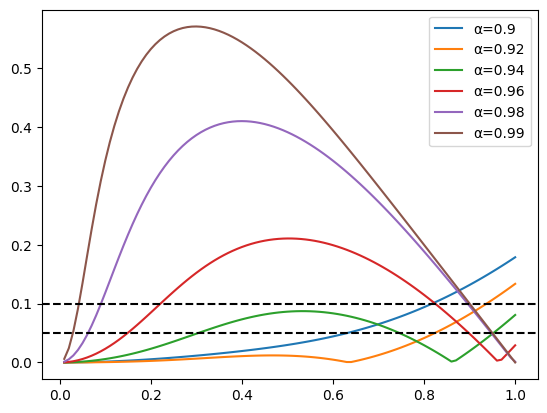

In [150]:
fig, ax = plt.subplots(1, 1)
αvals = [0.9, 0.92, 0.94,0.96, 0.98, 0.99]
βvals = np.arange(0.01, 1.01, 0.01)

for α in αvals:
    trueβ = []
    for β in βvals:
        τ1, τ2, n_iter, err = flexTPCroots(α, β, wref=wref, err_tol=1e-10)
        trueβ.append(τ2 - τ1)
    trueβ = np.array(trueβ)
    plt.plot(βvals, np.abs(βvals - trueβ) / (trueβ) , '-', label=f'α={α}')

plt.axhline(y=0.05, linestyle='--', color='black')
plt.axhline(y=0.1, linestyle='--', color='black')
    
plt.legend(loc='best')

In [ ]:
fig, ax = plt.subplots(1, 1)

ax.plot()

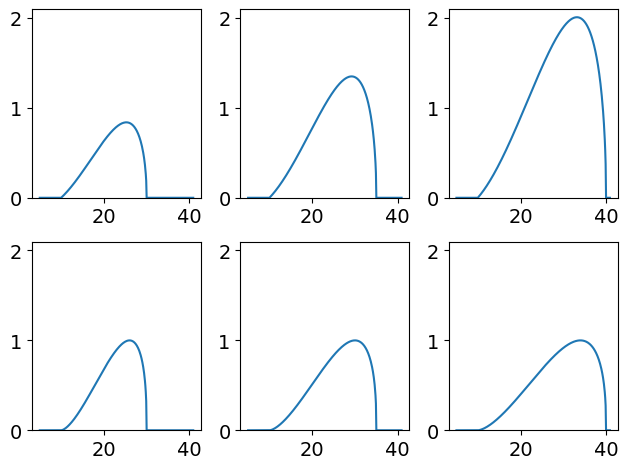

In [158]:
T = np.arange(5, 41, 0.1)

fig, axarr = plt.subplots(2, 3)

for i, Tmax in enumerate([30, 35, 40]):
    ax = axarr[0, i]
    #ax.plot(T, flexTPC(T, Tmin=10.0, rmax=0.1, Tmax=Tmax, α=0.8, s=2))
    ax.plot(T, briere1(T, Tmin=10.0, Tmax=Tmax, c=0.001))
    ax.set_ylim(0, 2.1)
    
for i, Tmax in enumerate([30, 35, 40]):
    ax = axarr[1, i]
    ax.plot(T, flexTPC(T, Tmin=10.0, rmax=1.0, Tmax=Tmax, α=0.8, s=2))
    ax.set_ylim(0, 2.1)

plt.tight_layout()
plt.show()

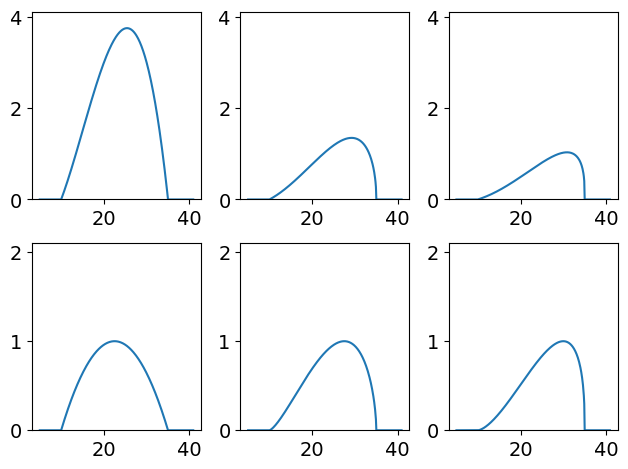

In [164]:
T = np.arange(5, 41, 0.1)

fig, axarr = plt.subplots(2, 3)

for i, m in enumerate([1, 2, 3]):
    ax = axarr[0, i]
    #ax.plot(T, flexTPC(T, Tmin=10.0, rmax=0.1, Tmax=Tmax, α=0.8, s=2))
    ax.plot(T, briere2(T, Tmin=10.0, Tmax=35.0, c=0.001, m=m))
    ax.set_ylim(0, 4.1)
    
for i, α in enumerate([0.5, 0.7, 0.8]):
    ax = axarr[1, i]
    ax.plot(T, flexTPC(T, Tmin=10.0, rmax=1.0, Tmax=35.0, α=α, s=2.0))
    ax.set_ylim(0, 2.1)

plt.tight_layout()
plt.show()

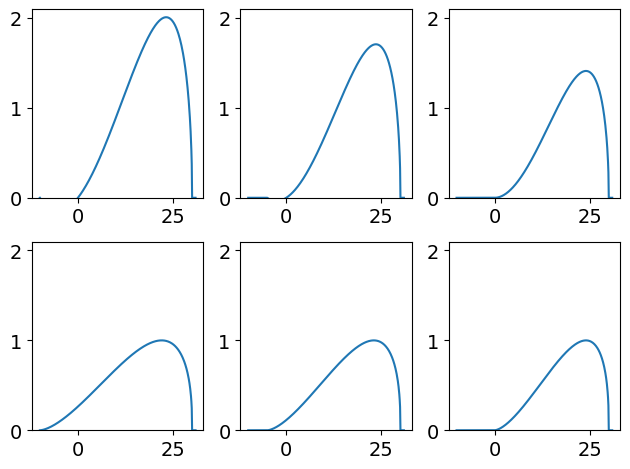

In [167]:
T = np.arange(-10, 31, 0.1)

fig, axarr = plt.subplots(2, 3)

for i, Tmin in enumerate([-10, -5, 0]):
    ax = axarr[0, i]
    #ax.plot(T, flexTPC(T, Tmin=10.0, rmax=0.1, Tmax=Tmax, α=0.8, s=2))
    ax.plot(T, briere1(T, Tmin=Tmin, Tmax=30.0, c=0.001))
    ax.set_ylim(0, 2.1)
    
for i, Tmin in enumerate([-10, -5, 0]):
    ax = axarr[1, i]
    ax.plot(T, flexTPC(T, Tmin=Tmin, rmax=1.0, Tmax=30.0, α=0.8, s=2))
    ax.set_ylim(0, 2.1)

plt.tight_layout()
plt.show()